In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

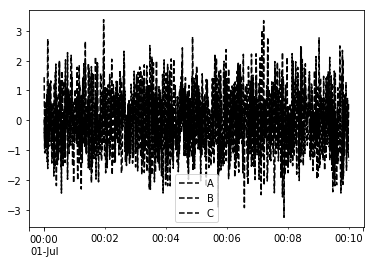

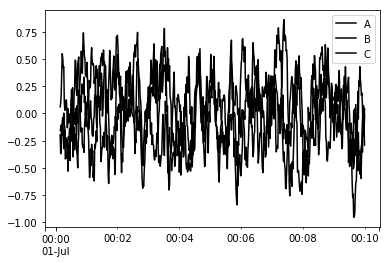

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/Users/brianlubeck/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,0.215306,-0.460607,-0.562523
2016-07-01 00:00:02,-0.214951,-0.045192,-0.762192
2016-07-01 00:00:03,-0.035556,-0.255352,-0.635161
2016-07-01 00:00:04,-0.261327,-0.158829,-0.580648
2016-07-01 00:00:05,-0.126980,-0.103926,-0.255187
2016-07-01 00:00:06,-0.385468,0.038991,-0.105532
2016-07-01 00:00:07,-0.364470,-0.275460,0.434017
2016-07-01 00:00:08,-0.468345,-0.314603,0.415665
2016-07-01 00:00:09,-0.188979,-0.125207,0.196243


In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

,A,B,C,D
2016-06-06,0.685246,-0.541571,-1.056291,0.805075
2016-06-07,-0.631867,-1.745005,-0.731970,-0.585621
2016-06-08,-1.235462,1.125786,0.007057,0.222041
2016-06-09,0.704998,-1.270563,1.502253,-0.655678
2016-06-10,0.937213,0.025571,-0.985684,0.404913


array([<matplotlib.axes._subplots.AxesSubplot object at 0x116543470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1167514a8>], dtype=object)

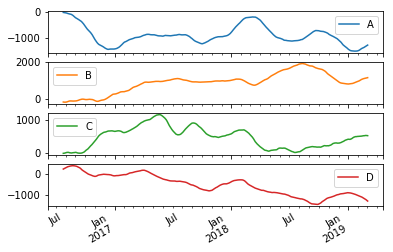

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,1.220855,1.405349,0.895920,0.413557


In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,0.369313,-1.414073,-1.422276,0.512265
2016-06-08,-0.147819,-1.329645,-1.541919,0.488675
2016-06-09,-0.230136,-1.605072,-1.226177,0.312960
2016-06-10,-0.092083,-1.765214,-1.233868,0.288514


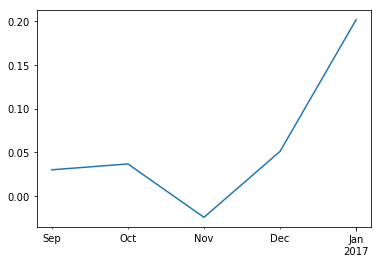

In [11]:
ts_long = pd.Series(np.random.randn(200), pd.date_range('7/1/16', freq = 'D', periods = 200))
ts_long.resample('M').mean().rolling(window = 3).mean().plot()

A         B         C         D      
           sum count sum count sum count sum count
2016-06-06 NaN   1.0 NaN   1.0 NaN   1.0 NaN   1.0
2016-06-07 NaN   2.0 NaN   2.0 NaN   2.0 NaN   2.0
2016-06-08 NaN   3.0 NaN   3.0 NaN   3.0 NaN   3.0
2016-06-09 NaN   4.0 NaN   4.0 NaN   4.0 NaN   4.0
2016-06-10 NaN   5.0 NaN   5.0 NaN   5.0 NaN   5.0

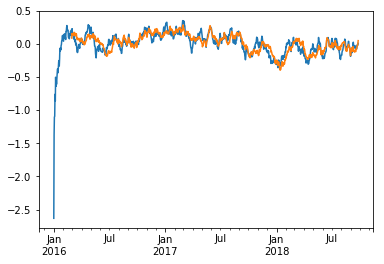

In [12]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?
# it should provide a more stable statistic
# rolling statistic more appropriate if events closer to present are more important than more distant time periods
#1
ts = pd.Series(np.random.randn(1000), index = pd.date_range(start = '1/1/16', periods = 1000, freq = 'D'))
ts.ewm(span = 60, freq = 'D', min_periods = 0, adjust = True).mean().plot()
ts.rolling(window = 60).mean().plot()

#2 
# To get a more reliable statistic if it makes logical sense

#3
r = df.rolling(window = 20)
r.apply(lambda x: sorted(x)[round(len(x)*.5)])

#4
r = df.rolling(window = 20)
r.agg(['sum', 'count']).head()

In [ ]:
# EWMA
# Why use EWMA?
exponentially weighted moving average important to weight nearness in time of events

In [ ]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate
df.expanding(min_periods = 1).mean()[1:5]

In [ ]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting